**Import  Libraries and Load  Data:**

In [6]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load the Dataset
df =pd.read_csv('laptop.csv')

**Data Exploration and Understanding:**



In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [10]:
df.shape

(1303, 13)

**Data Preprocessing:**



In [11]:
#Drop the  unwanted columns
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1,inplace=True)

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
#Checking the null values
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [14]:
#Checking the special characters
columns_special_chars = df.isin(['?', '-', '--', 'N/A', 'n/a', 'NULL', '-999', '...', '*', '#', '@', '!']).sum()

# Print the count of special characters in each column
print(columns_special_chars)


Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64


In [15]:
# List of special characters or strings to check
special_chars = ['?', '-', '--', 'N/A', 'n/a', 'NULL', '-999', '...', '*', '#', '@', '!']

# Initialize a dictionary to store the results
special_char_locations = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    # Find the rows where special characters are present
    for char in special_chars:
        locations = df[df[column] == char].index.tolist()
        if locations:
            if column not in special_char_locations:
                special_char_locations[column] = {}
            special_char_locations[column][char] = locations

# Display the results
special_char_locations


{'Inches': {'?': [476]}, 'Memory': {'?': [770]}, 'Weight': {'?': [208]}}

In [16]:
indexes = [476, 770, 208]
df.iloc[indexes]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.2400
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.7200


In [17]:
df['Inches'].mode()[0]

'15.6'

In [18]:
df['Inches']=df['Inches'].str.replace('?',df['Inches'].mode()[0]).astype('float')

In [19]:
df['Memory'].mode()[0]

'256GB SSD'

In [20]:
df['Memory']=df['Memory'].str.replace('?',df['Memory'].mode()[0])

In [21]:
df['Weight'].mode()[0]

'2.2kg'

In [22]:
df['Weight']=df['Weight'].str.replace('?',df['Weight'].mode()[0])

In [23]:
indexes = [476, 770, 208]
df.iloc[indexes]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.2400
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,77202.7200


In [24]:
#Drop the Null values
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.3+ KB


In [27]:
df['Ram']=df['Ram'].str.replace('GB','').astype('int32')

In [28]:
df['Weight']=df['Weight'].str.replace('kg','').astype('float32')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.4+ KB


**Bar chart**

<Axes: xlabel='Company'>

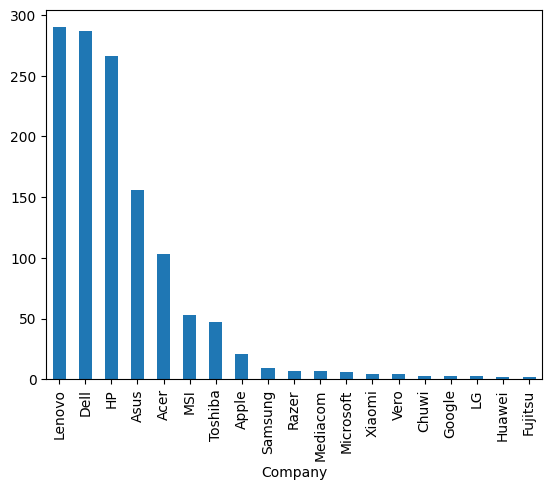

In [30]:
df['Company'].value_counts().plot(kind='bar')

**Distribution of the Price**

<Axes: xlabel='Price', ylabel='Density'>

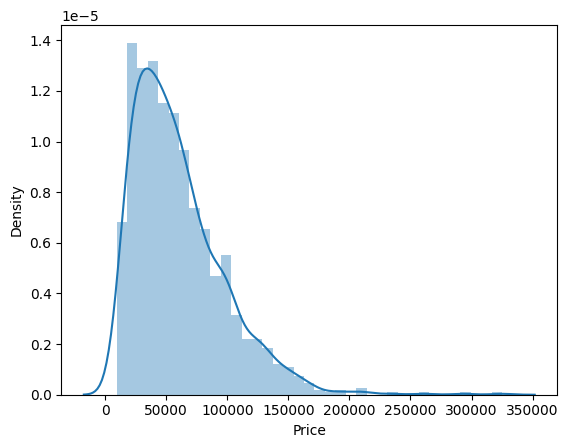

In [31]:
sns.distplot(df['Price'])

**Barplot of the Company and Price**

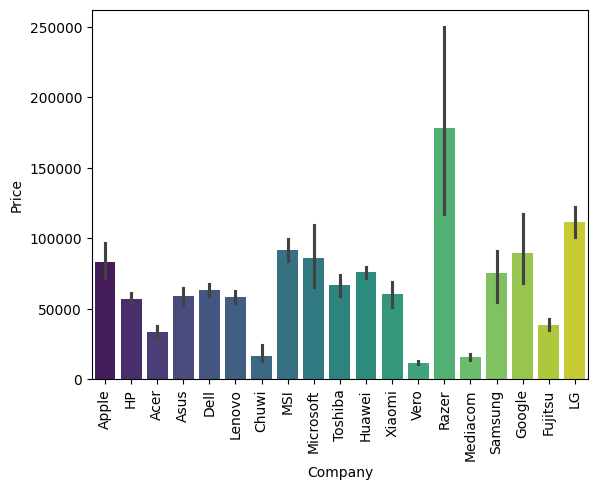

In [32]:
sns.barplot(x=df["Company"],y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

**Barplot of TypeName**

<Axes: xlabel='TypeName'>

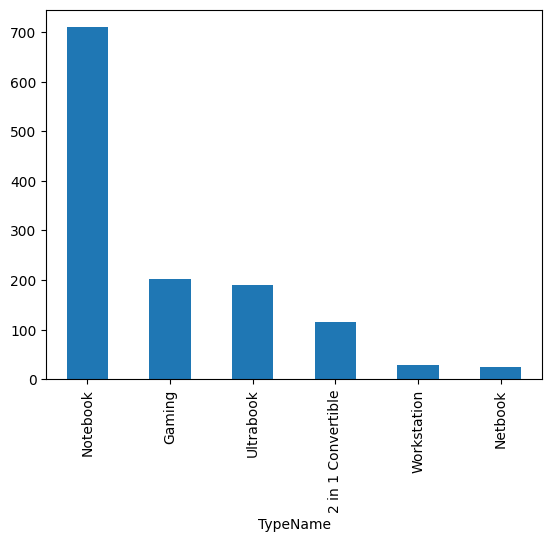

In [33]:
df['TypeName'].value_counts().plot(kind='bar')

**Barplot of TypeName and Price**

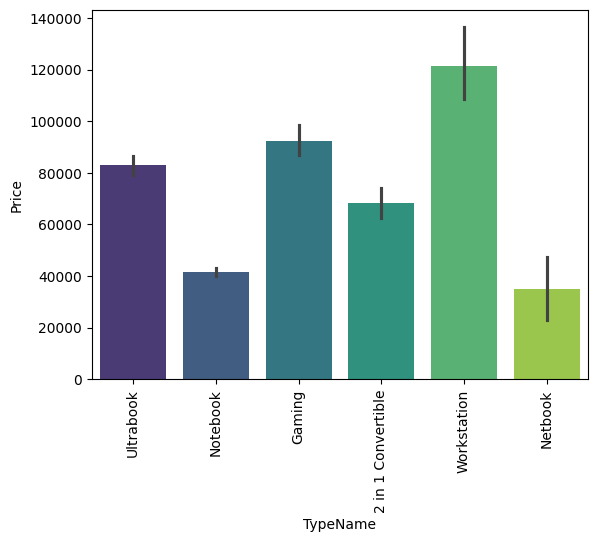

In [34]:
sns.barplot(x=df["TypeName"],y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

**Distplot of Inches**

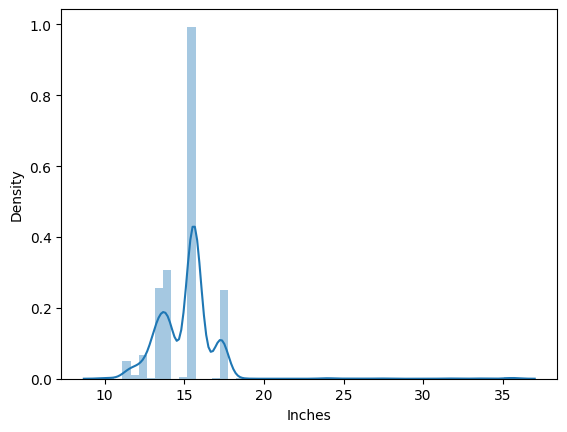

In [35]:
sns.distplot(df['Inches'])
plt.show()

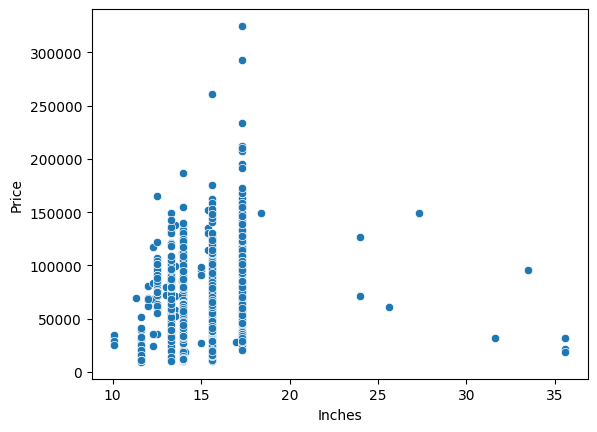

In [36]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.show()

**Feature Engineering:**

**Screen Analysis**








In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [38]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [39]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

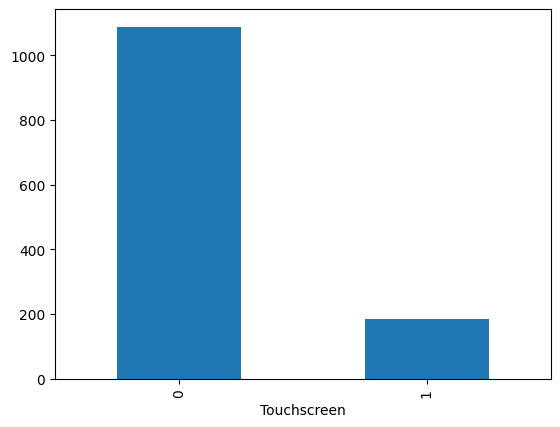

In [41]:
df['Touchscreen'].value_counts().plot(kind='bar')

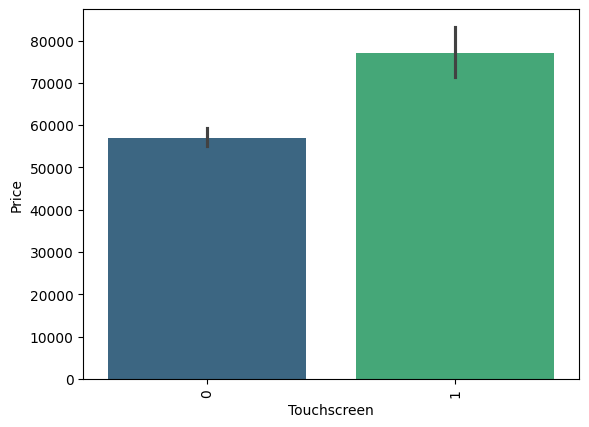

In [42]:
sns.barplot(x=df["Touchscreen"],y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [43]:
df['IPS']=df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

<Axes: xlabel='IPS'>

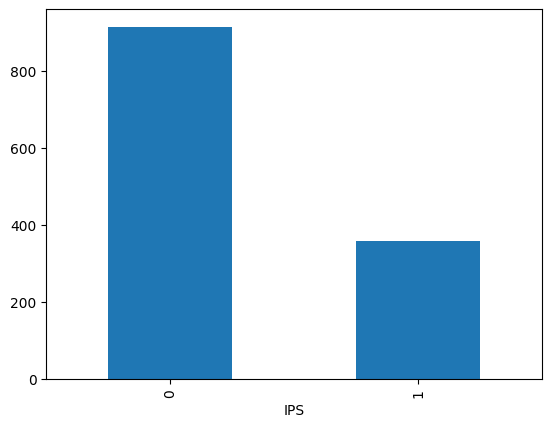

In [44]:
df['IPS'].value_counts().plot(kind='bar')

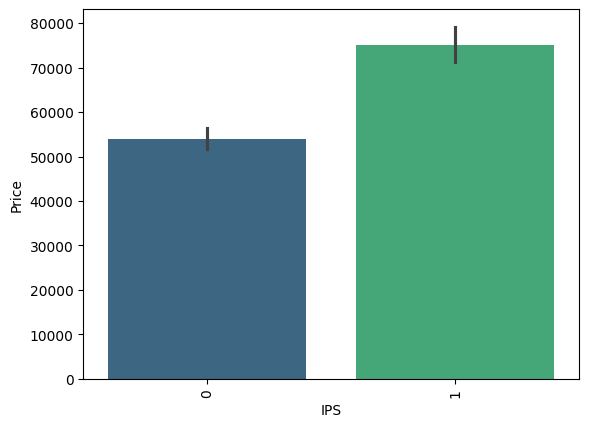

In [45]:
sns.barplot(x=df["IPS"],y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [46]:
new=df['ScreenResolution'].str.split('x', n=1, expand=True)

In [47]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [48]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [49]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [50]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  X_res             1273 non-null   object 
 14  Y_res             1273 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 149.2+ KB


In [52]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 149.2+ KB


In [54]:
#Calucalting the PPI using PPI Formula
df['Ppi']=((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']

In [55]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,Ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float32
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  IPS               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
 15  Ppi               1273 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64(4), 

<Axes: >

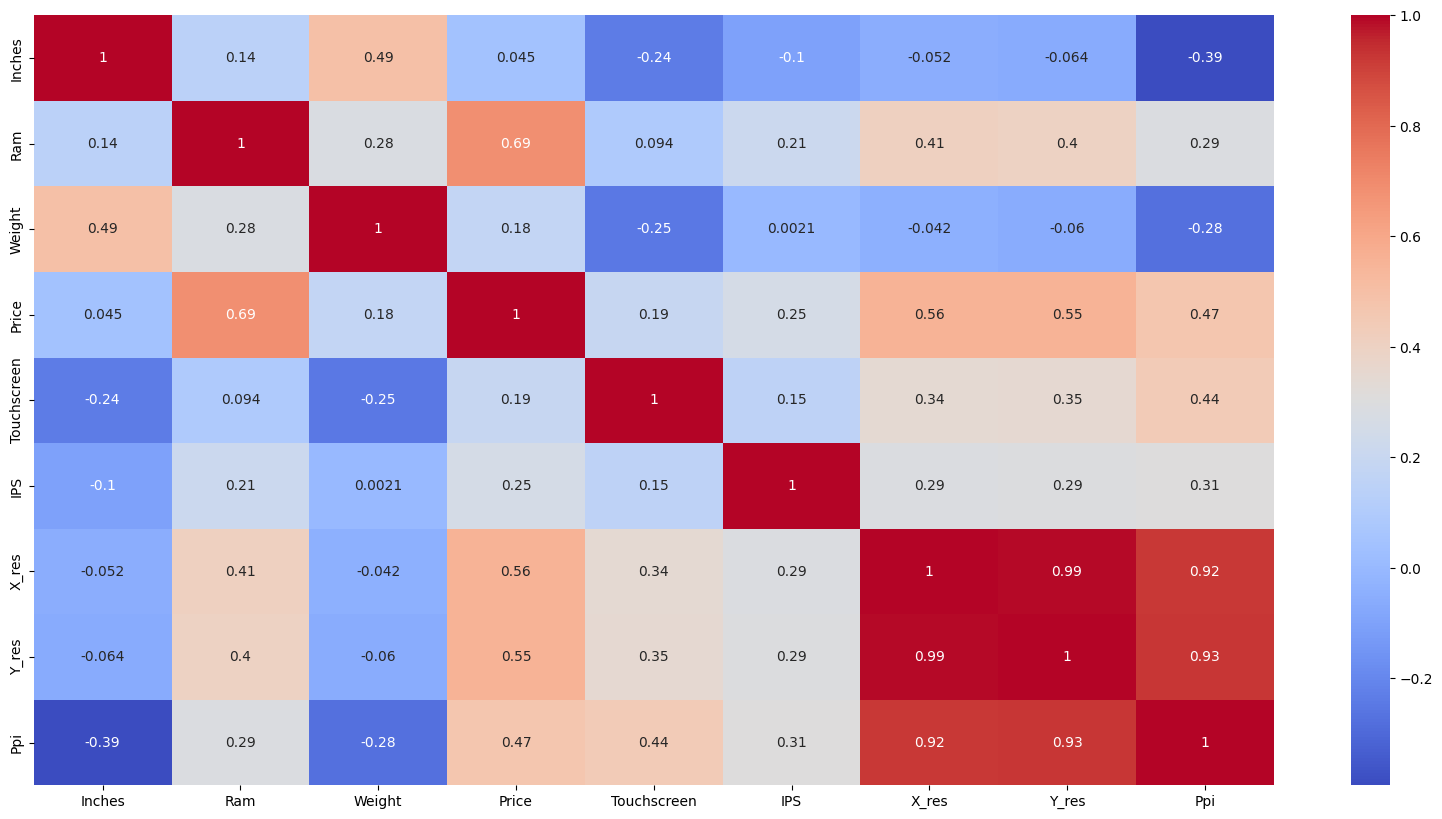

In [57]:
#Numeric columns
numeric_df=df.select_dtypes(include='number')
plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')

In [58]:
#Dropping the ScreenResolution, X_res and Y_res columns
df=df.drop(columns=['ScreenResolution', 'X_res', 'Y_res'])
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670


In [59]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i7 2.2GHz,1
AMD A6-Series 7310 2GHz,1


In [60]:
df['Cpu Name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [61]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3' :
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [62]:
df['Cpu Brand']=df['Cpu Name'].apply(fetch_processor)

<Axes: xlabel='Cpu Brand'>

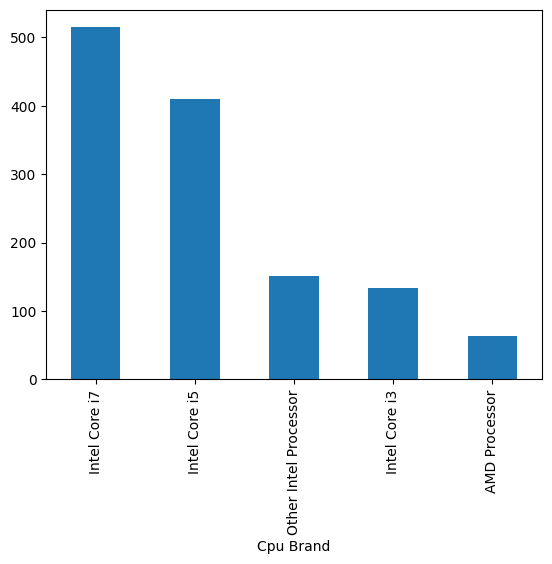

In [63]:
df['Cpu Brand'].value_counts().plot(kind='bar')

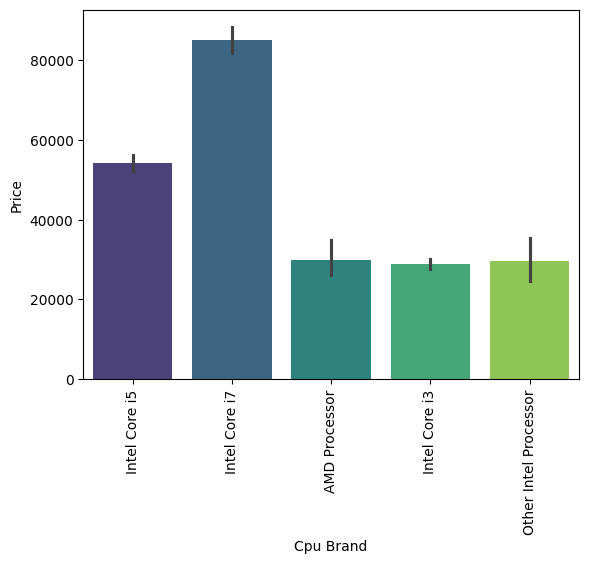

In [64]:
sns.barplot(x=df["Cpu Brand"], y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [65]:
df.drop(columns=["Cpu", "Cpu Name"], inplace=True)

In [66]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

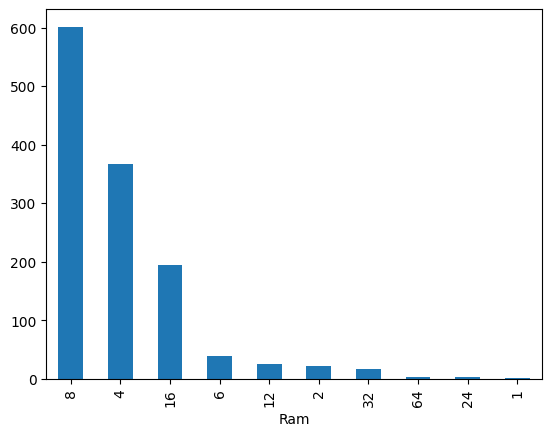

In [67]:
df["Ram"].value_counts().plot(kind="bar")

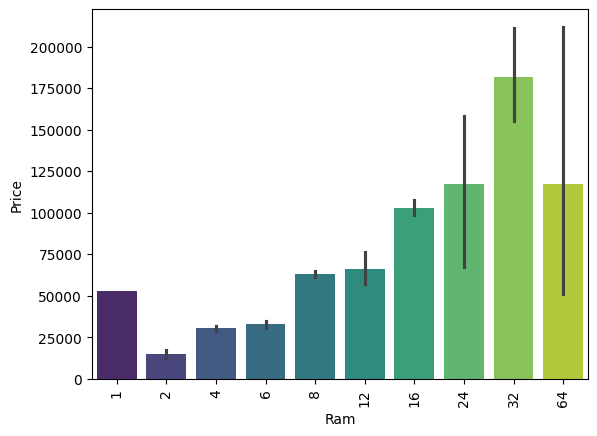

In [68]:
sns.barplot(x=df["Ram"], y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [69]:
df["Memory"].value_counts()

,count
Memory,
256GB SSD,402
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [70]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [71]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '',regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '',regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [72]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
870,Lenovo,Notebook,15.6,4,500 HDD,Intel HD Graphics 620,Windows 10,2.38,56210.4000,0,0,100.454670,Intel Core i5,500,0,0,0
686,HP,Notebook,15.6,4,500 HDD,AMD Radeon 520,Windows 10,1.86,32639.8608,0,0,100.454670,Intel Core i5,500,0,0,0
1197,Asus,Gaming,17.3,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,114552.0000,0,1,127.335675,Intel Core i7,1000,512,0,0
496,Lenovo,Notebook,15.6,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.17,47893.3920,0,0,141.211998,Intel Core i7,0,256,0,0
246,HP,Notebook,15.6,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.04,29783.5200,1,0,100.454670,Intel Core i5,1000,0,0,0


In [73]:
df.drop(columns=["Memory"],inplace=True)

In [74]:
numeric_df=df.select_dtypes(include='number')
numeric_df.corr()["Price"]

,Price
Inches,0.044966
Ram,0.685648
Weight,0.175966
Price,1.000000
Touchscreen,0.188994
IPS,0.254851
Ppi,0.468636
HDD,-0.095394
SSD,0.668716
Hybrid,0.007843


In [75]:
df.drop(columns=["Hybrid", "Flash_Storage"], inplace=True)

In [76]:
df["Gpu"].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [77]:
df["Gpu Brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [78]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [79]:
df["Gpu Brand"].value_counts()

,count
Gpu Brand,
Intel,703
Nvidia,393
AMD,176
ARM,1


In [80]:
df=df[df["Gpu Brand"]!="ARM"]
df["Gpu Brand"].value_counts()

,count
Gpu Brand,
Intel,703
Nvidia,393
AMD,176


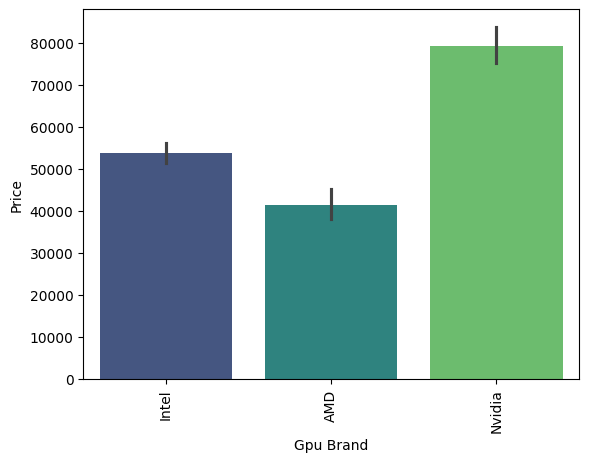

In [81]:
sns.barplot(x=df["Gpu Brand"], y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [82]:
df.drop(columns=["Gpu"],inplace=True)

In [83]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [84]:
df["OpSys"].value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


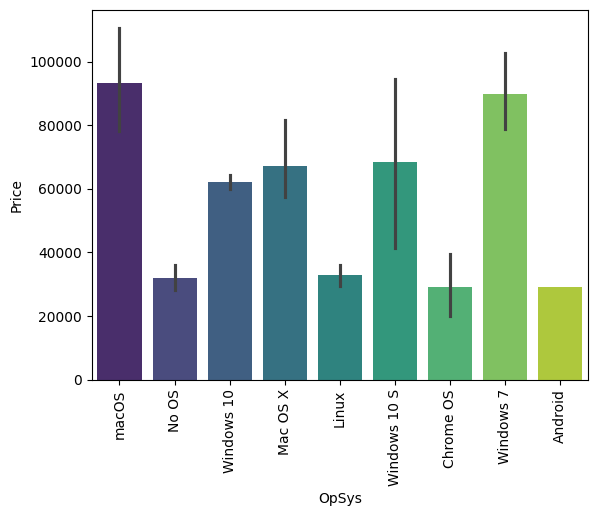

In [85]:
sns.barplot(x=df["OpSys"], y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [86]:
def os_type(inp):
    if inp == 'Windows 10' or inp == 'Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [87]:
df["Os"]=df["OpSys"].apply(os_type)

In [88]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand,HDD,SSD,Gpu Brand,Os
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


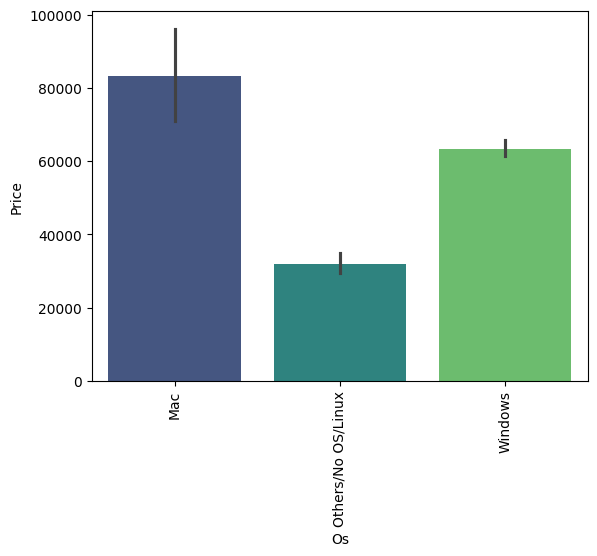

In [89]:
sns.barplot(x=df["Os"], y=df["Price"],palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [90]:
df.drop(columns=["OpSys"],inplace=True)

In [91]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand,HDD,SSD,Gpu Brand,Os
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='Weight', ylabel='Density'>

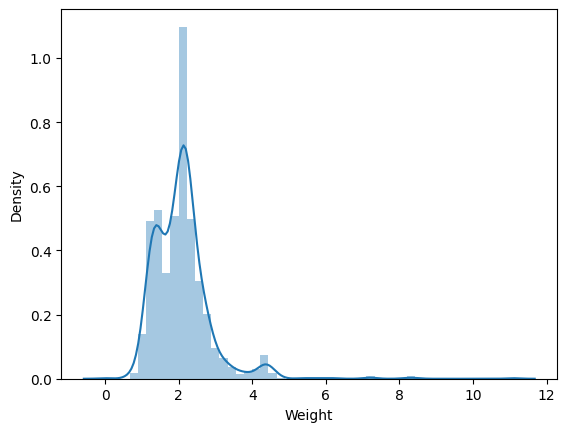

In [92]:
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

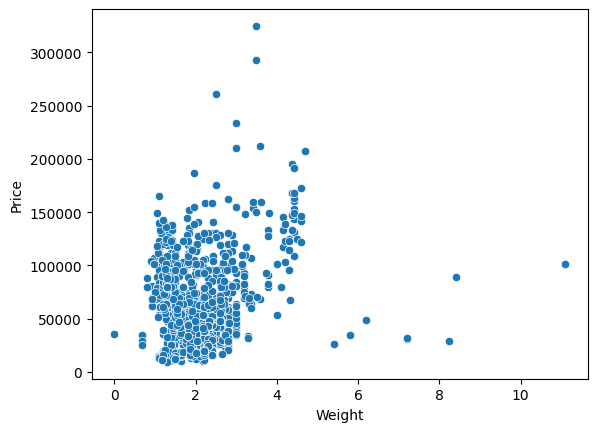

In [93]:
sns.scatterplot(x=df["Weight"], y=df["Price"])

In [94]:
numeric_df=df.select_dtypes(include='number')
numeric_df.corr()["Price"]

,Price
Inches,0.044252
Ram,0.685521
Weight,0.175486
Price,1.000000
Touchscreen,0.190738
IPS,0.255987
Ppi,0.470554
HDD,-0.095855
SSD,0.668572


<Axes: >

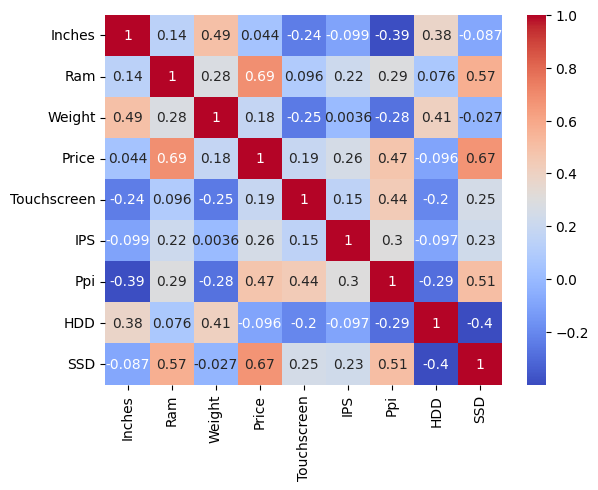

In [95]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Price', ylabel='Density'>

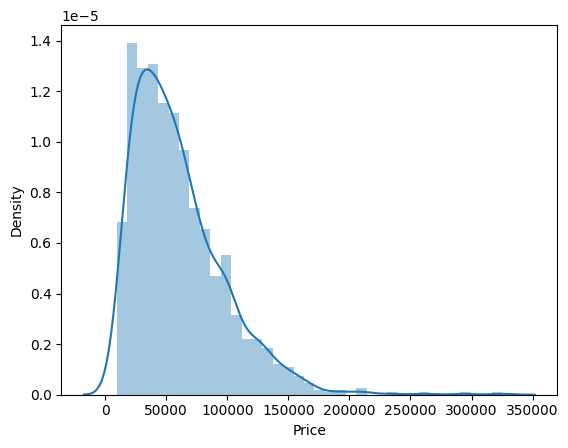

In [96]:
sns.distplot(df["Price"])

<Axes: xlabel='Price', ylabel='Density'>

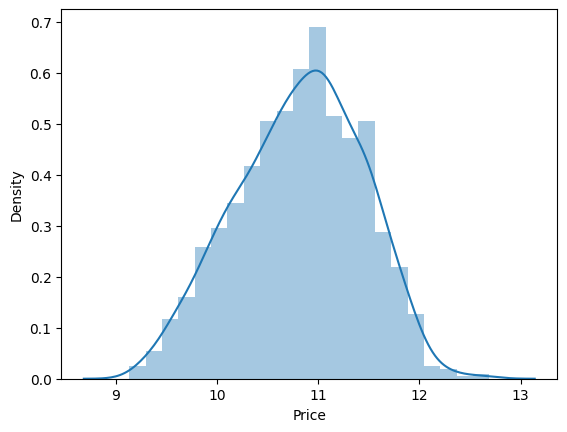

In [97]:
sns.distplot(np.log(df['Price']))

**Model Development:**


In [98]:
#Creating the features and target value
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [99]:
X

,Company,TypeName,Inches,Ram,Weight,Touchscreen,IPS,Ppi,Cpu Brand,HDD,SSD,Gpu Brand,Os
0,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [100]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [101]:
#importing the necessary Libraries
%%capture
!pip install scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [102]:
#Importing train and test and separate the train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

**Linear Regression Model**

In [103]:
#Defining categorical features for column_transformer
categorical_features=X.select_dtypes(include='object').columns
column_transformer=ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),categorical_features)],remainder='passthrough')
#creating the pipeline
lr_model=Pipeline(steps=[('preprocessor',column_transformer),('model',LinearRegression())])
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.8298365079489978
MAE 0.22020012442256318


**Random Forest Model**

In [104]:
#Defining categorical features for column_transformer
categorical_features=X.select_dtypes(include='object').columns
column_transformer=ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),categorical_features)],remainder='passthrough')
#creating the pipeline
rf_model=Pipeline(steps=[('preprocessor',column_transformer),('model',RandomForestRegressor())])
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.9004980789589849
MAE 0.16125775478457696


**Gradient Boosting Model**

In [105]:
#Defining categorical features for column_transformer
categorical_features=X.select_dtypes(include='object').columns
column_transformer=ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),categorical_features)],remainder='passthrough')
#creating the pipeline
gb_model=Pipeline(steps=[('preprocessor',column_transformer),('model',GradientBoostingRegressor())])
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.8739082024915719
MAE 0.18563148071114116


**kNeighbors Model**

In [106]:
#Defining categorical features for column_transformer
categorical_features=X.select_dtypes(include='object').columns
column_transformer=ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),categorical_features)],remainder='passthrough')
#creating the pipeline
kn_model=Pipeline(steps=[('preprocessor',column_transformer),('model',KNeighborsRegressor())])
kn_model.fit(X_train,y_train)
y_pred=kn_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.7674540325699413
MAE 0.24126365562077443


**Decision Tree Model**

In [107]:
#Defining categorical features for column_transformer
categorical_features=X.select_dtypes(include='object').columns
column_transformer=ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),categorical_features)],remainder='passthrough')
#creating the pipeline
dt_model=Pipeline(steps=[('preprocessor',column_transformer),('model',DecisionTreeRegressor())])
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 score 0.8257712001672932
MAE 0.20808555155547517


**Hyperparameter Tuning for Models**

1.Linear Regression Model

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = {
    'model__alpha': uniform(0.01, 10)  # Regularization strength
}


# Define categorical features
categorical_features = X.select_dtypes(include='object').columns

# Define ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline with Ridge regression
ridge_model = Pipeline(
    steps=[
        ('preprocessor', column_transformer),
        ('model', Ridge())
    ]
)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # Performance metric
    n_jobs=-1,  # Use all available CPUs
    verbose=1,  # Verbose output to track the progress
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('Best Parameters:', random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2 score 0.8279255323087258
MAE 0.22203668616895897
Best Parameters: {'model__alpha': 1.7152412368729153}


2.Random Forest Model

In [109]:
from scipy.stats import randint
param_distributions = {
    'model__n_estimators': randint(100, 500),  # Number of trees in the forest
    'model__max_depth': randint(10, 50),  # Maximum depth of the trees
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'model__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'model__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Define categorical features
categorical_features = X.select_dtypes(include='object').columns

# Define ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline with RandomForestRegressor
rf_model = Pipeline(
    steps=[
        ('preprocessor', column_transformer),
        ('model', RandomForestRegressor())
    ]
)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # Performance metric
    n_jobs=-1,  # Use all available CPUs
    verbose=1,  # Verbose output to track the progress
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('Best Parameters:', random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2 score 0.8972523389427158
MAE 0.16516307516585926
Best Parameters: {'model__bootstrap': True, 'model__max_depth': 46, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 267}


3.Gradient Boosting Model

In [110]:
param_distributions = {
    'model__n_estimators': randint(100, 500),  # Number of boosting stages
    'model__learning_rate': uniform(0.01, 0.2),  # Learning rate
    'model__max_depth': randint(3, 10),  # Maximum depth of individual trees
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'model__subsample': uniform(0.5, 0.5)  # Fraction of samples to be used for fitting the trees
}

# Define categorical features
categorical_features = X.select_dtypes(include='object').columns

# Define ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline with GradientBoostingRegressor
gb_model = Pipeline(
    steps=[
        ('preprocessor', column_transformer),
        ('model', GradientBoostingRegressor())
    ]
)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # Performance metric
    n_jobs=-1,  # Use all available CPUs
    verbose=1,  # Verbose output to track the progress
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('Best Parameters:', random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2 score 0.8953937855039965
MAE 0.15970162466510157
Best Parameters: {'model__learning_rate': 0.08893829336189445, 'model__max_depth': 8, 'model__min_samples_leaf': 3, 'model__min_samples_split': 9, 'model__n_estimators': 273, 'model__subsample': 0.5485882468853842}


4.KNeighbors Model

In [111]:
param_distributions = {
    'model__n_neighbors': randint(1, 20),  # Number of neighbors to use
    'model__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'model__p': [1, 2],  # Power parameter for the Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Define categorical features
categorical_features = X.select_dtypes(include='object').columns

# Define ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline with KNeighborsRegressor
kn_model = Pipeline(
    steps=[
        ('preprocessor', column_transformer),
        ('model', KNeighborsRegressor())
    ]
)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=kn_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # Performance metric
    n_jobs=-1,  # Use all available CPUs
    verbose=1,  # Verbose output to track the progress
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('Best Parameters:', random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2 score 0.812344206688057
MAE 0.21188720411611614
Best Parameters: {'model__n_neighbors': 4, 'model__p': 1, 'model__weights': 'distance'}


5.Decision Tree Model

In [112]:
param_distributions = {
    'model__max_depth': randint(1, 20),  # Maximum depth of the tree
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'model__min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'model__criterion': ['mse', 'friedman_mse', 'mae'],  # Function to measure the quality of a split
}

# Define categorical features
categorical_features = X.select_dtypes(include='object').columns

# Define ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline with DecisionTreeRegressor
dt_model = Pipeline(
    steps=[
        ('preprocessor', column_transformer),
        ('model', DecisionTreeRegressor())
    ]
)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',  # Performance metric
    n_jobs=-1,  # Use all available CPUs
    verbose=1,  # Verbose output to track the progress
    random_state=42  # For reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('Best Parameters:', random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2 score 0.8408297404102555
MAE 0.2038727520178994
Best Parameters: {'model__criterion': 'friedman_mse', 'model__max_depth': 8, 'model__min_samples_leaf': 3, 'model__min_samples_split': 17}


1.Linear Regression Model(Before Hyperparameter Tuning)

R2 score 0.8298365079489978

MAE 0.22020012442256318


---


1.Linear Regression Model(After Hyperparameter Tuning)

R2 score 0.8279255323087258

MAE 0.22203668616895897

Best Parameters: {'model__alpha': 1.7152412368729153}

---

2.Random Forest Model(Before Hyperparameter Tuning)

R2 score 0.9004980789589849

MAE 0.16125775478457696


---


2.Random Forest Model(After Hyperparameter Tuning)

R2 score 0.8972523389427158

MAE 0.16516307516585926

Best Parameters: {'model__bootstrap': True, 'model__max_depth': 46, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 267}

---

3.Gradient Boosting Model(Before Hyperparameter Tuning)

R2 score 0.8739082024915719

MAE 0.18563148071114116

---


3.Gradient Boosting Model(After Hyperparameter Tuning)

R2 score 0.8953937855039965

MAE 0.15970162466510157

Best Parameters: {'model__learning_rate': 0.08893829336189445, 'model__max_depth': 8, 'model__min_samples_leaf': 3, 'model__min_samples_split': 9, 'model__n_estimators': 273, 'model__subsample': 0.5485882468853842}

---



4.KNeighbors Model(Before Hyperparameter Tuning)

R2 score 0.7674540325699413

MAE 0.24126365562077443

---

4.KNeighbors Model(After Hyperparameter Tuning)

R2 score 0.812344206688057

MAE 0.21188720411611614

Best Parameters: {'model__n_neighbors': 4, 'model__p': 1, 'model__weights': 'distance'}

---
5.Decision Tree Model(Before Hyperparameter Tuning)

R2 score 0.8257712001672932

MAE 0.20808555155547517

---

5.Decision Tree Model(After Hyperparameter Tuning)

R2 score 0.8408297404102555

MAE 0.2038727520178994

Best Parameters: {'model__criterion': 'friedman_mse', 'model__max_depth': 8, 'model__min_samples_leaf': 3, 'model__min_samples_split': 17}


Both Random Forest Model and Gradient Boosting Model are performing well But Random Forest Model is the best model because it has good  R2 score 0.9004980789589849

In [124]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,IPS,Ppi,Cpu Brand,HDD,SSD,Gpu Brand,Os
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


**Real-time Predictions:**



In [123]:
# Step 1: Defining categorical and numerical features for ColumnTransformer
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

# Step 2: Defining the ColumnTransformer with StandardScaler and OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Step 3: Creating the pipeline with RandomForestRegressor
rf_model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor())
])

# Step 4: Fitting the pipeline with training data
rf_model.fit(X_train, y_train)

# Step 5: Creating a new dataframe for prediction
new_laptop = {
    'Company': 'Dell',
    'TypeName': 'Ultrabook',
    'Inches': 13.3,
    'Ram': 8,
    'Weight': 1.21,
    'Touchscreen': 0,
    'IPS': 1,
    'Ppi': 250,
    'Cpu Brand': 'Intel Core i5',
    'HDD': 0,
    'SSD': 256,
    'Gpu Brand': 'Intel',
    'Os': 'Windows'
}

# Step 6: Converting the new data to a DataFrame
new_laptop_df = pd.DataFrame([new_laptop])

# Step 7: Predicting the price of the new laptop
prediction = rf_model.predict(new_laptop_df)
p = np.exp(prediction)[0]  # Assuming you have used log transformation on the target variable

# Step 8: Printing the predicted price
print('Your New Laptop Price is:', p)


Your New Laptop Price is: 85539.13216711713


**Interpretability and Insights:**

Uncover insights into which features play a pivotal role in pricing decisions.

Company, Ram, Touchscreen,Ppi,SSD plays a Pivotal role in pricing decisions

**Questions to Explore:**

1.Which features have the most significant impact on laptop prices?

Ans.Company, Ram, Touchscreen,Ppi,SSD features has most significant impact on laptop prices


2.Can the model accurately predict the prices of laptops from lesser-known brands?

Ans.The model may not be as accurate at predicting prices for lesser-known brands due to limited data on those brands in the training dataset.

3.Does the brand of the laptop significantly influence its price?

Ans.Yes, certain brands tend to have higher prices than others, likely due to factors like brand reputation and build quality.

4.How well does the model perform on laptops with high-end specifications compared to budget laptops?

Ans. The model performs differently on high-end and budget laptops due to potential biases in the training data.

5.What are the limitations and challenges in predicting laptop prices accurately?

Ans.Accurately predicting laptop prices is challenging due to factors like fluctuating market conditions, complex feature interactions, and the subjective nature of certain features.

6.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

Ans.The model's performance on newly released laptops depends on how similar they are to the laptops in the training dataset. If the new laptops have features or brands that weren't in the training data, the model might not be accurate.






